In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/computer-vision/landmarks_fixed.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,x0,y0,z0,visibility0,x1,y1,z1,visibility1,x2,y2,...,visibility30,x31,y31,z31,visibility31,x32,y32,z32,visibility32,label
0,0.017942,-0.614115,-0.324684,0.999968,0.037722,-0.631337,-0.311465,0.999891,0.039600,-0.629876,...,0.930736,0.085112,0.817557,0.238597,0.980941,-0.211197,0.758264,0.144318,0.983767,Left
1,0.018637,-0.597788,-0.349394,0.999958,0.037871,-0.617472,-0.340479,0.999868,0.040115,-0.616318,...,0.951576,0.063388,0.803196,0.240235,0.986386,-0.212848,0.745983,0.111291,0.991144,Left
2,0.027511,-0.590038,-0.358719,0.999983,0.047702,-0.608323,-0.347724,0.999946,0.050136,-0.606586,...,0.953628,0.076926,0.819616,0.234101,0.988808,-0.232068,0.750802,0.107644,0.991330,Left
3,0.018899,-0.588885,-0.414691,0.999972,0.037577,-0.606801,-0.404381,0.999909,0.038844,-0.604650,...,0.960613,0.064794,0.814373,0.287504,0.990622,-0.214760,0.761582,0.166752,0.991755,Left
4,0.020302,-0.588473,-0.325397,0.999945,0.036266,-0.606524,-0.313812,0.999814,0.038243,-0.604666,...,0.927588,0.064318,0.834513,0.212448,0.978343,-0.235896,0.775620,0.093858,0.984457,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.082629,-0.556225,-0.230945,0.999996,0.103516,-0.578811,-0.212227,0.999995,0.104357,-0.579933,...,0.941492,0.120937,0.417848,0.096842,0.988055,-0.093742,0.400960,0.079801,0.957604,Under
351,0.024288,-0.514790,-0.471134,0.999932,0.043179,-0.542101,-0.460262,0.999900,0.044990,-0.539001,...,0.945279,0.086099,0.418692,0.054756,0.985016,-0.129176,0.418426,0.025248,0.983459,Under
352,-0.107360,-0.442190,-0.518749,0.999925,-0.096188,-0.478548,-0.517810,0.999855,-0.094232,-0.475303,...,0.938743,0.146599,0.528439,-0.008251,0.984237,-0.133867,0.493709,-0.018131,0.976232,Under
353,-0.102821,-0.399695,-0.535261,0.999999,-0.086363,-0.436426,-0.531507,0.999999,-0.085264,-0.433905,...,0.374504,0.220689,0.417742,0.077062,0.366292,-0.080990,0.375593,0.124713,0.248728,Under


In [ ]:
df["label"].value_counts()

Right    136
Left     124
Under     95
Name: label, dtype: int64

In [ ]:
df.describe()

,x0,y0,z0,visibility0,x1,y1,z1,visibility1,x2,y2,...,z30,visibility30,x31,y31,z31,visibility31,x32,y32,z32,visibility32
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,...,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,-0.018100,-0.560573,-0.358592,0.999460,-0.000209,-0.582361,-0.350809,0.998913,0.000830,-0.582453,...,0.164343,0.719312,0.133146,0.689165,0.193980,0.820588,-0.127729,0.654746,0.106279,0.815045
std,0.054594,0.083819,0.087518,0.006222,0.054158,0.082256,0.089718,0.008634,0.054051,0.082818,...,0.086292,0.272136,0.085625,0.166105,0.081541,0.294713,0.090817,0.162680,0.079326,0.290165
min,-0.214987,-0.654000,-0.659238,0.882778,-0.187726,-0.671676,-0.663687,0.839695,-0.186725,-0.671075,...,-0.210843,0.003538,-0.108642,0.131609,-0.098329,0.003957,-0.383080,0.118466,-0.248677,0.002679
25%,-0.050023,-0.605586,-0.388545,0.999758,-0.033241,-0.624957,-0.379679,0.999320,-0.032430,-0.625510,...,0.108514,0.650727,0.085253,0.655675,0.155486,0.859300,-0.195940,0.611159,0.062196,0.817635
50%,-0.019167,-0.587048,-0.338297,0.999943,0.000871,-0.607267,-0.332831,0.999857,0.001589,-0.607773,...,0.187791,0.818214,0.129402,0.766775,0.201594,0.963892,-0.118833,0.734635,0.114309,0.950284
75%,0.017811,-0.550171,-0.304163,0.999981,0.037034,-0.574486,-0.294371,0.999958,0.038474,-0.573615,...,0.225612,0.926914,0.166862,0.793585,0.234259,0.986800,-0.067978,0.753651,0.153041,0.983807
max,0.221633,0.393636,-0.200052,1.000000,0.225378,0.401912,-0.191000,1.000000,0.228111,0.400523,...,0.447438,0.984154,0.504503,0.853621,0.523003,0.997516,0.147976,0.801024,0.419937,0.997044


In [ ]:
pd.DataFrame(df.drop(["label"], axis=1).to_numpy().reshape((-1, 4)), columns=["x", "y", "z", "visibility"]).describe()

,x,y,z,visibility
count,11715.000000,11715.000000,11715.000000,11715.000000
mean,0.001803,-0.160823,-0.144602,0.938873
std,0.173149,0.482667,0.213627,0.167589
min,-0.455996,-0.913535,-0.687807,0.002679
25%,-0.107527,-0.586587,-0.309845,0.967721
50%,-0.007629,-0.341567,-0.173853,0.995645
75%,0.118206,0.116097,0.012053,0.999899
max,0.589526,0.853621,0.530271,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

y = df["label"]
X = df.drop(["label"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE

cols = X.columns
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)
print(y_train.value_counts())

Right    95
Left     95
Under    95
Name: label, dtype: int64


# Evalutation with whole dataset

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

df_all = pd.read_csv("/content/drive/Shareddrives/computer-vision/landmarks_fixed.csv")
df_all.drop(columns=["Unnamed: 0"], inplace=True)

def evaluate_dataset(model, X, y):
  y_pred = model.predict(X)
  print(classification_report(y, y_pred, digits=4))
  plot_confusion_matrix(model, X, y)
  plt.show()

# No Translation (x, y, z, vis)

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)
model = xgb.XGBClassifier(n_jobs=-1, verbose=10)
model.fit(X_train, y_train, sample_weight=classes_weights)

XGBClassifier(n_jobs=-1, objective='multi:softprob', verbose=10)

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000        95
       Right     1.0000    1.0000    1.0000        95
       Under     1.0000    1.0000    1.0000        95

    accuracy                         1.0000       285
   macro avg     1.0000    1.0000    1.0000       285
weighted avg     1.0000    1.0000    1.0000       285



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


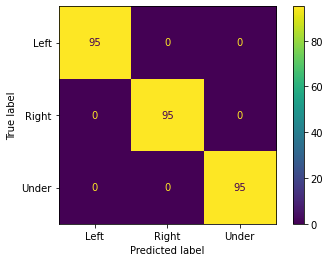

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred, digits=4))
plot_confusion_matrix(model, X_train, y_train)
plt.show()

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000        37
       Right     1.0000    1.0000    1.0000        41
       Under     1.0000    1.0000    1.0000        29

    accuracy                         1.0000       107
   macro avg     1.0000    1.0000    1.0000       107
weighted avg     1.0000    1.0000    1.0000       107



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


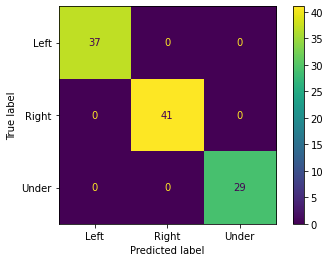

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))
plot_confusion_matrix(model, X_test, y_test)
plt.show()

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000       124
       Right     1.0000    1.0000    1.0000       136
       Under     1.0000    1.0000    1.0000        95

    accuracy                         1.0000       355
   macro avg     1.0000    1.0000    1.0000       355
weighted avg     1.0000    1.0000    1.0000       355



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


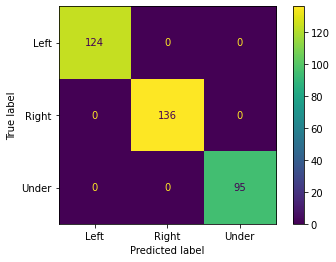

In [ ]:
evaluate_dataset(model, X=df_all.drop(["label"], axis=1), y=df_all["label"])

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000        95
       Right     1.0000    1.0000    1.0000        95
       Under     1.0000    1.0000    1.0000        95

    accuracy                         1.0000       285
   macro avg     1.0000    1.0000    1.0000       285
weighted avg     1.0000    1.0000    1.0000       285



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


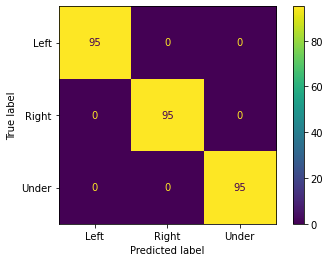

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred, digits=4))
plot_confusion_matrix(model, X_train, y_train)
plt.show()

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000        37
       Right     1.0000    1.0000    1.0000        41
       Under     1.0000    1.0000    1.0000        29

    accuracy                         1.0000       107
   macro avg     1.0000    1.0000    1.0000       107
weighted avg     1.0000    1.0000    1.0000       107



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


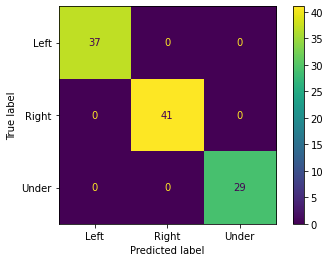

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))
plot_confusion_matrix(model, X_test, y_test)
plt.show()

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000       124
       Right     1.0000    1.0000    1.0000       136
       Under     1.0000    1.0000    1.0000        95

    accuracy                         1.0000       355
   macro avg     1.0000    1.0000    1.0000       355
weighted avg     1.0000    1.0000    1.0000       355



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


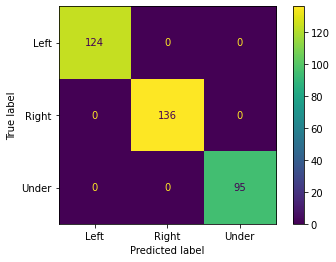

In [ ]:
evaluate_dataset(model, X=df_all.drop(["label"], axis=1), y=df_all["label"])

# No Translation (x, y, z)

## XGBoost

In [ ]:
X_train_novis = X_train.drop(list(filter(lambda col: "visibility" in col, df.columns)), axis=1)
X_test_novis = X_test.drop(list(filter(lambda col: "visibility" in col, df.columns)), axis=1)

In [ ]:
import xgboost as xgb
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)
model = xgb.XGBClassifier(n_jobs=-1, verbose=10)
model.fit(X_train_novis, y_train, sample_weight=classes_weights)

XGBClassifier(n_jobs=-1, objective='multi:softprob', verbose=10)

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000        95
       Right     1.0000    1.0000    1.0000        95
       Under     1.0000    1.0000    1.0000        95

    accuracy                         1.0000       285
   macro avg     1.0000    1.0000    1.0000       285
weighted avg     1.0000    1.0000    1.0000       285



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


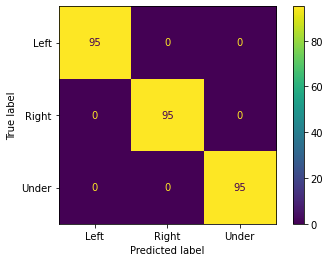

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

y_pred = model.predict(X_train_novis)
print(classification_report(y_train, y_pred, digits=4))
plot_confusion_matrix(model, X_train_novis, y_train)
plt.show()

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000        37
       Right     1.0000    1.0000    1.0000        41
       Under     1.0000    1.0000    1.0000        29

    accuracy                         1.0000       107
   macro avg     1.0000    1.0000    1.0000       107
weighted avg     1.0000    1.0000    1.0000       107



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


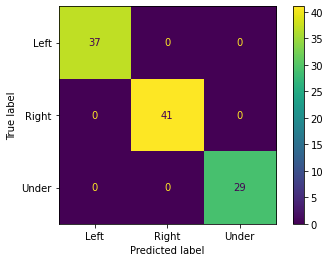

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

y_pred = model.predict(X_test_novis)
print(classification_report(y_test, y_pred, digits=4))
plot_confusion_matrix(model, X_test_novis, y_test)
plt.show()

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000       124
       Right     1.0000    1.0000    1.0000       136
       Under     1.0000    1.0000    1.0000        95

    accuracy                         1.0000       355
   macro avg     1.0000    1.0000    1.0000       355
weighted avg     1.0000    1.0000    1.0000       355



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


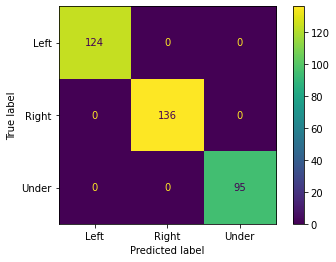

In [ ]:
evaluate_dataset(model, X=df_all.drop(["label"] + list(filter(lambda col: "visibility" in col, df.columns)), axis=1), y=df_all["label"])

## XGBoost with regression (to overcome overfit)

In [ ]:
import xgboost as xgb
from sklearn.utils import class_weight

model = xgb.XGBClassifier(reg_lambda=500, eval_metric="mlogloss", n_jobs=-1, verbose=10)
model.fit(X_train_novis, y_train)

XGBClassifier(eval_metric='mlogloss', n_jobs=-1, objective='multi:softprob',
              reg_lambda=500, verbose=10)

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000        95
       Right     1.0000    1.0000    1.0000        95
       Under     1.0000    1.0000    1.0000        95

    accuracy                         1.0000       285
   macro avg     1.0000    1.0000    1.0000       285
weighted avg     1.0000    1.0000    1.0000       285



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


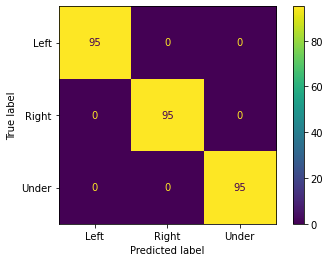

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

y_pred = model.predict(X_train_novis)
print(classification_report(y_train, y_pred, digits=4))
plot_confusion_matrix(model, X_train_novis, y_train)
plt.show()

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000        37
       Right     1.0000    1.0000    1.0000        41
       Under     1.0000    1.0000    1.0000        29

    accuracy                         1.0000       107
   macro avg     1.0000    1.0000    1.0000       107
weighted avg     1.0000    1.0000    1.0000       107



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


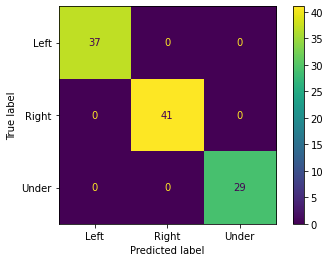

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

y_pred = model.predict(X_test_novis)
print(classification_report(y_test, y_pred, digits=4))
plot_confusion_matrix(model, X_test_novis, y_test)
plt.show()

# With Translation (x, y, z, vis)

In [ ]:
X_train_trans = X_train.copy()
X_test_trans = X_test.copy()
X_all = df_all.drop(["label"], axis=1).copy()
y_all = df_all["label"].copy()

x_cols = ["x%d" % i for i in range(33)]
y_cols = ["y%d" % i for i in range(33)]
z_cols = ["z%d" % i for i in range(33)]

midx = (X_train["x23"] + X_train["x24"]) / 2
midy = (X_train["y23"] + X_train["y24"]) / 2
midz = (X_train["z23"] + X_train["z24"]) / 2
X_train_trans[x_cols] = X_train[x_cols] - midx.to_numpy().reshape(-1, 1)
X_train_trans[y_cols] = X_train[y_cols] - midy.to_numpy().reshape(-1, 1)
X_train_trans[z_cols] = X_train[z_cols] - midz.to_numpy().reshape(-1, 1)

midx = (X_test["x23"] + X_test["x24"]) / 2
midy = (X_test["y23"] + X_test["y24"]) / 2
midz = (X_test["z23"] + X_test["z24"]) / 2
X_test_trans[x_cols] = X_test[x_cols] - midx.to_numpy().reshape(-1, 1)
X_test_trans[y_cols] = X_test[y_cols] - midy.to_numpy().reshape(-1, 1)
X_test_trans[z_cols] = X_test[z_cols] - midz.to_numpy().reshape(-1, 1)

midx = (X_all["x23"] + X_all["x24"]) / 2
midy = (X_all["y23"] + X_all["y24"]) / 2
midz = (X_all["z23"] + X_all["z24"]) / 2
X_all[x_cols] = X_all[x_cols] - midx.to_numpy().reshape(-1, 1)
X_all[y_cols] = X_all[y_cols] - midy.to_numpy().reshape(-1, 1)
X_all[z_cols] = X_all[z_cols] - midz.to_numpy().reshape(-1, 1)

X_train_trans

,x0,y0,z0,visibility0,x1,y1,z1,visibility1,x2,y2,...,z30,visibility30,x31,y31,z31,visibility31,x32,y32,z32,visibility32
0,0.026523,-0.583422,-0.368902,0.999990,0.049435,-0.603126,-0.360881,0.999974,0.049908,-0.604315,...,0.236451,0.948923,0.083112,0.785991,0.256450,0.986129,-0.239833,0.716846,0.158808,0.987980
1,-0.037235,-0.604751,-0.305251,0.999926,-0.028218,-0.624022,-0.294275,0.999730,-0.027000,-0.623253,...,0.183547,0.894766,0.108251,0.792959,0.212794,0.987299,-0.130321,0.759125,0.083370,0.983616
2,0.029458,-0.580144,-0.361438,0.999977,0.051035,-0.600883,-0.354856,0.999930,0.051427,-0.602448,...,0.221324,0.941302,0.047314,0.782696,0.217583,0.989477,-0.238159,0.728822,0.131673,0.988297
3,0.048794,-0.533501,-0.366192,0.998114,0.072060,-0.557141,-0.360992,0.997297,0.072701,-0.557934,...,0.158468,0.713612,0.240596,0.476800,0.129802,0.867092,-0.185631,0.416737,0.126227,0.784516
4,-0.093764,-0.618572,-0.240954,0.999487,-0.079665,-0.638308,-0.226345,0.998333,-0.078524,-0.637348,...,0.157271,0.818214,0.128558,0.810382,0.180194,0.950199,-0.019748,0.783010,0.078735,0.942815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.079790,-0.450347,-0.571860,0.999994,0.095857,-0.480469,-0.562677,0.999987,0.097413,-0.477538,...,0.138899,0.893800,0.194264,0.692475,0.102397,0.963978,-0.249210,0.636735,0.093337,0.951920
281,-0.062029,-0.547289,-0.342803,0.999752,-0.034990,-0.570638,-0.336020,0.999469,-0.033155,-0.570419,...,0.113117,0.773969,0.093031,0.549459,0.120493,0.917796,-0.119241,0.519699,0.098758,0.902188
282,-0.168433,-0.434600,-0.457867,0.999900,-0.150029,-0.471534,-0.459333,0.999885,-0.147312,-0.468755,...,0.018880,0.972895,0.106737,0.344386,-0.080617,0.989558,-0.220998,0.347288,-0.028431,0.987910
283,-0.082996,-0.404376,-0.533991,0.999840,-0.055857,-0.434601,-0.529567,0.999669,-0.055060,-0.433565,...,0.115450,0.018524,0.011938,0.311484,0.148677,0.026330,-0.166966,0.272078,0.149734,0.011968


## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)
model = xgb.XGBClassifier(n_jobs=-1, verbose=10)
model.fit(X_train_trans, y_train, sample_weight=classes_weights)

XGBClassifier(n_jobs=-1, objective='multi:softprob', verbose=10)

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000        95
       Right     1.0000    1.0000    1.0000        95
       Under     1.0000    1.0000    1.0000        95

    accuracy                         1.0000       285
   macro avg     1.0000    1.0000    1.0000       285
weighted avg     1.0000    1.0000    1.0000       285



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


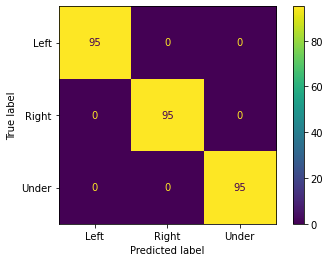

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

y_pred = model.predict(X_train_trans)
print(classification_report(y_train, y_pred, digits=4))
plot_confusion_matrix(model, X_train_trans, y_train)
plt.show()

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000        37
       Right     1.0000    1.0000    1.0000        41
       Under     1.0000    1.0000    1.0000        29

    accuracy                         1.0000       107
   macro avg     1.0000    1.0000    1.0000       107
weighted avg     1.0000    1.0000    1.0000       107



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


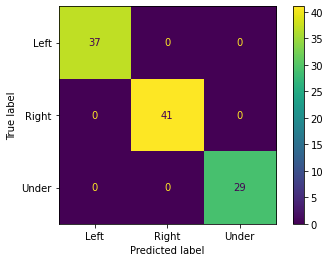

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

y_pred = model.predict(X_test_trans)
print(classification_report(y_test, y_pred, digits=4))
plot_confusion_matrix(model, X_test_trans, y_test)
plt.show()

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000       124
       Right     1.0000    1.0000    1.0000       136
       Under     1.0000    1.0000    1.0000        95

    accuracy                         1.0000       355
   macro avg     1.0000    1.0000    1.0000       355
weighted avg     1.0000    1.0000    1.0000       355



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


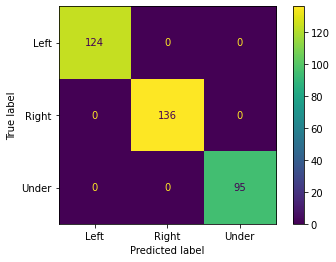

In [ ]:
evaluate_dataset(model, X=X_all, y=y_all)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train_trans, y_train)

KNeighborsClassifier(n_jobs=-1)

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000        95
       Right     1.0000    1.0000    1.0000        95
       Under     1.0000    1.0000    1.0000        95

    accuracy                         1.0000       285
   macro avg     1.0000    1.0000    1.0000       285
weighted avg     1.0000    1.0000    1.0000       285



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


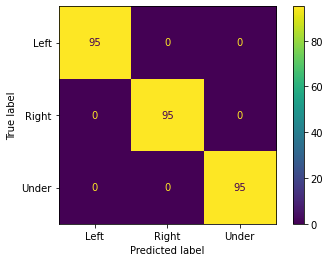

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

y_pred = model.predict(X_train_trans)
print(classification_report(y_train, y_pred, digits=4))
plot_confusion_matrix(model, X_train_trans, y_train)
plt.show()

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000        37
       Right     1.0000    1.0000    1.0000        41
       Under     1.0000    1.0000    1.0000        29

    accuracy                         1.0000       107
   macro avg     1.0000    1.0000    1.0000       107
weighted avg     1.0000    1.0000    1.0000       107



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


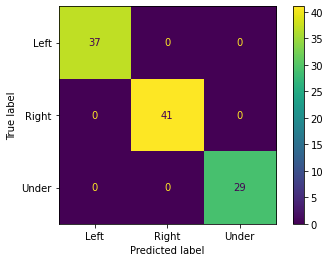

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

y_pred = model.predict(X_test_trans)
print(classification_report(y_test, y_pred, digits=4))
plot_confusion_matrix(model, X_test_trans, y_test)
plt.show()

              precision    recall  f1-score   support

        Left     1.0000    1.0000    1.0000       124
       Right     1.0000    1.0000    1.0000       136
       Under     1.0000    1.0000    1.0000        95

    accuracy                         1.0000       355
   macro avg     1.0000    1.0000    1.0000       355
weighted avg     1.0000    1.0000    1.0000       355



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


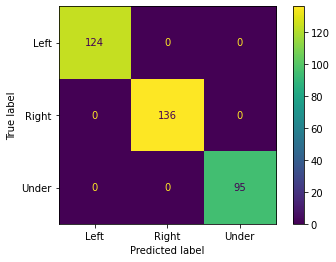

In [ ]:
evaluate_dataset(model, X=X_all, y=y_all)